<a href="https://colab.research.google.com/github/dpetrovic89/Telenor-Churn/blob/main/3%20Model_Creation_Telenor_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dpetrovic89/data/main/Telenor-Clean-Data-Churn.csv')

In [3]:
df.head()

,SUBSCRIBER_ID,BNUM_OUT,BNUM_IN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT,CHURN
0,1,2.000000,3.000000,-1.0,-1.0,0.000000,0.0,2.0,1.0,163,-1.0,-1.0,1
1,2,52.000000,32.000000,3.0,2.0,1.000000,0.0,0.0,966.0,76,2.0,3.0,0
2,3,9.847961,14.552527,-1.0,-1.0,2.484862,-1.0,-1.0,-1.0,118,-1.0,0.0,0
3,4,4.000000,5.000000,-1.0,-1.0,3.000000,0.0,5.0,5.0,107,4.0,2.0,1
4,5,0.000000,14.000000,0.0,-1.0,0.000000,0.0,0.0,0.0,149,6.0,2.0,0


In [18]:
# stratified data split

from sklearn.model_selection import train_test_split

X = df.drop(['SUBSCRIBER_ID','CHURN'],axis=1)
y = df['CHURN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)


In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 11), (1000, 11), (4000,), (1000,))

In [24]:
column_names   = [x for x in X_train.columns]
column_names

['BNUM_OUT',
 'BNUM_IN',
 'PROD_CNT_MACRO',
 'REV_BUN_MAC',
 'REV_OUT',
 'USAGE_OUT_INT_DUR',
 'USAGE_OUT_OFFNET_DUR',
 'USAGE_OUT_ONNET_DUR',
 'LNE_TENURE',
 'TOPUP_AMT',
 'TOPUP_CNT']

In [17]:
X_train

,SUBSCRIBER_ID,BNUM_OUT,BNUM_IN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT
4257,4258,3.0,8.0,0.0,-1.0,1.0,0.0,5.0,3.0,140,1.0,1.0
1047,1048,4.0,0.0,0.0,-1.0,13.0,0.0,0.0,0.0,160,10.0,1.0
2208,2209,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,164,-1.0,-1.0
4242,4243,0.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,124,-1.0,-1.0
3048,3049,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,15.0,72,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
522,523,1.0,3.0,0.0,-1.0,0.0,0.0,2.0,0.0,125,-1.0,-1.0
1498,1499,34.0,31.0,1.0,6.0,18.0,0.0,135.0,142.0,118,23.0,8.0
154,155,10.0,11.0,-1.0,-1.0,3.0,0.0,12.0,8.0,115,4.0,2.0
4214,4215,15.0,23.0,4.0,8.0,0.0,0.0,0.0,890.0,106,8.0,4.0


# Scaled data

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


In [30]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)

X_test_scaled=scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)


In [31]:
X_train_scaled

,BNUM_OUT,BNUM_IN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT
0,-0.529095,-0.378063,0.023968,-0.399035,-0.301338,-0.074395,-0.088745,-0.314935,0.593439,-0.295501,-0.052540
1,-0.452985,-0.839742,0.023968,-0.399035,2.068762,-0.074395,-0.283746,-0.328237,1.197302,0.919718,-0.052540
2,-0.681317,-0.839742,-0.632682,-0.399035,-0.498847,-0.074395,-0.283746,-0.328237,1.318075,-0.565549,-0.780996
3,-0.757427,-0.724323,0.023968,-0.399035,-0.498847,-0.074395,-0.283746,-0.328237,0.110348,-0.565549,-0.780996
4,-0.757427,-0.782033,-0.632682,-0.399035,-0.498847,-0.074395,-0.283746,-0.261726,-1.459695,-0.565549,-0.780996
...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.681317,-0.666613,0.023968,-0.399035,-0.498847,-0.074395,-0.205746,-0.328237,0.140542,-0.565549,-0.780996
3996,1.830335,0.949266,0.680618,2.487296,3.056304,-0.074395,4.981286,0.301404,-0.070810,2.675033,2.497058
3997,0.003679,-0.204933,-0.632682,-0.399035,0.093679,-0.074395,0.184257,-0.292765,-0.161390,0.109572,0.311688
3998,0.384232,0.487586,2.650568,3.311963,-0.498847,-0.074395,-0.283746,3.618105,-0.433128,0.649669,1.040145


In [32]:
X_test_scaled

,BNUM_OUT,BNUM_IN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT
0,-0.605206,-0.782033,-0.632682,-0.399035,-0.498847,-0.074395,-0.244746,-0.206522,-1.248343,-0.295501,-0.052540
1,0.536454,0.083617,0.023968,-0.399035,2.068762,0.216875,-0.244746,-0.328237,0.744405,1.594839,0.311688
2,-0.757427,-0.031803,-0.632682,-0.399035,-0.498847,-0.074395,-0.283746,-0.328237,0.653825,-0.565549,-0.780996
3,-0.072431,0.141327,-0.632682,-0.399035,-0.301338,-0.074395,-0.127745,-0.323803,-1.278537,-0.160476,0.311688
4,2.134777,1.180106,2.650568,3.311963,-0.301338,-0.074395,-0.283746,5.218813,-0.795446,0.379621,1.040145
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.757427,-0.724323,-0.632682,-0.399035,-0.008066,-0.074395,-0.283746,-0.328237,1.287881,-0.565549,-0.780996
996,0.612564,-0.204933,2.650568,2.899629,-0.498847,-0.074395,-0.244746,1.503043,-0.251969,0.649669,1.040145
997,-0.007893,0.000083,0.023968,-0.399035,-0.008066,-0.171485,-0.322746,-0.332672,-0.191583,-0.565549,-0.780996
998,1.754224,2.161175,0.023968,-0.399035,1.476237,-0.074395,1.042262,0.305838,-1.640854,1.054742,1.404373


# # Load libraries



In [34]:
pip install catboost


     |████████████████████████████████| 76.3 MB 24 kB/s 


In [35]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from xgboost import XGBClassifier
from catboost import Pool, CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import model_selection


## Simple Algorithms

In [36]:
# Test options and evaluation metric
num_folds = 10
seed = 1389
scoring = 'recall'


In [37]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [39]:
results = []
names = []
for name, model in models:
    Skfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=Skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.142529 (0.036782)
LDA: 0.001149 (0.003448)
KNN: 0.428736 (0.059737)
CART: 0.451724 (0.057252)
NB: 0.901149 (0.049891)
SVM: 0.000000 (0.000000)


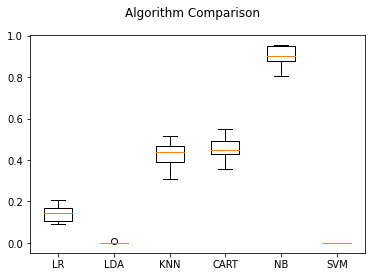

In [40]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## ensembles

In [41]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('HGB', HistGradientBoostingClassifier()))
ensembles.append(('XGB', XGBClassifier()))
ensembles.append(('CB', CatBoostClassifier()))
ensembles.append(('LGBM', LGBMClassifier()))
ensembles.append(('MLP', MLPClassifier()))

results = []
names = []
for name, model in ensembles:
    Skfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=Skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Streaming output truncated to the last 5000 lines.
6:	learn: 0.6281183	total: 14.5ms	remaining: 2.06s
7:	learn: 0.6198443	total: 16.7ms	remaining: 2.08s
8:	learn: 0.6121954	total: 18.9ms	remaining: 2.08s
9:	learn: 0.6048908	total: 21.1ms	remaining: 2.09s
10:	learn: 0.5955134	total: 23.3ms	remaining: 2.09s
11:	learn: 0.5875369	total: 32.8ms	remaining: 2.7s
12:	learn: 0.5808271	total: 37.2ms	remaining: 2.83s
13:	learn: 0.5750338	total: 39.6ms	remaining: 2.79s
14:	learn: 0.5696462	total: 41.6ms	remaining: 2.73s
15:	learn: 0.5634515	total: 43.8ms	remaining: 2.69s
16:	learn: 0.5570359	total: 46.2ms	remaining: 2.67s
17:	learn: 0.5514070	total: 49.1ms	remaining: 2.68s
18:	learn: 0.5469875	total: 51.2ms	remaining: 2.64s
19:	learn: 0.5426689	total: 53.3ms	remaining: 2.61s
20:	learn: 0.5368263	total: 55.5ms	remaining: 2.59s
21:	learn: 0.5325082	total: 57.6ms	remaining: 2.56s
22:	learn: 0.5281796	total: 59.9ms	remaining: 2.54s
23:	learn: 0.5240039	total: 62.1ms	remaining: 2.53s
24:	learn: 0.51918

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MLP: 0.428736 (0.067425)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


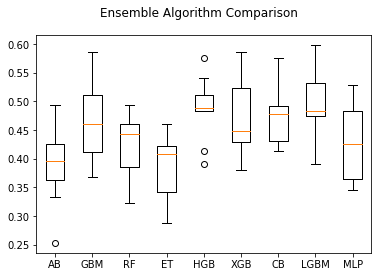

In [42]:
#CompareAlgorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [43]:
# prepare the model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

#estimate accuracy on test dataset
predictions = model.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.466
[[265 518]
 [ 16 201]]
              precision    recall  f1-score   support

           0       0.94      0.34      0.50       783
           1       0.28      0.93      0.43       217

    accuracy                           0.47      1000
   macro avg       0.61      0.63      0.46      1000
weighted avg       0.80      0.47      0.48      1000



In [44]:
import pickle

filename = 'final_model_GaussianNB.sav'
pickle.dump(model, open(filename, 'wb'))


# Results

## Results

Best Model is Gaussian Naive Bayes 

▶ with Recall of 93%

Final Confusion Matrix

Accuracy score = 0.466

        No Churn  [[265 518]
        Churn      [16 201]]
              No Churn, Churn
Model predicted 201 Customers will churn and didn't predicted 16.
